In [1]:
import pandas as pd
import numpy as np

from vega_datasets import data

#### Use the above dataset for the following exercises:

In [71]:
df = data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [73]:
df = df.set_index('date')
df = df.sort_index()

In [74]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


#### Resample by the day and take the average temperature. Visualize the average temperature over time.

In [12]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


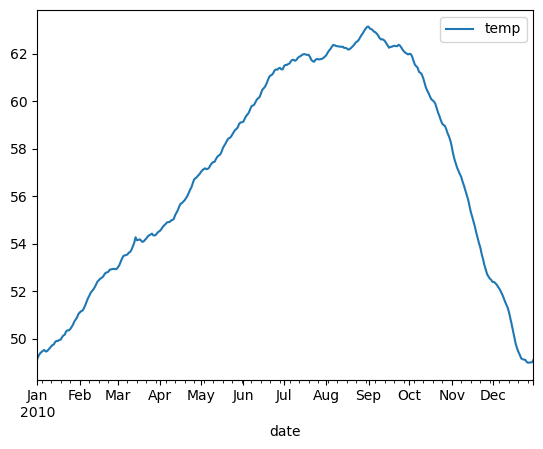

In [14]:
df.resample('D').mean().plot();

#### Write the code necessary to visualize the minimum temperature over time.

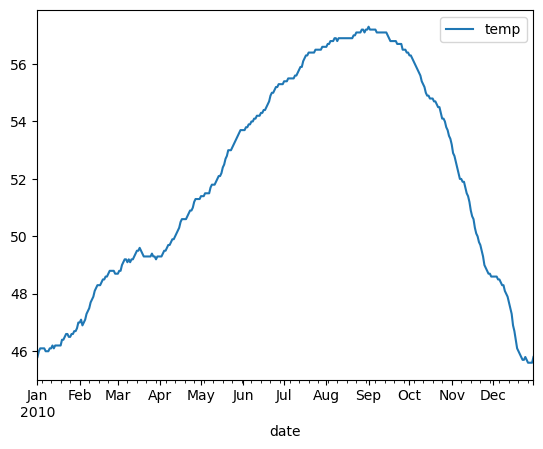

In [21]:
df.resample('D').min().plot();

#### Write the code necessary to visualize the maximum temperature over time.

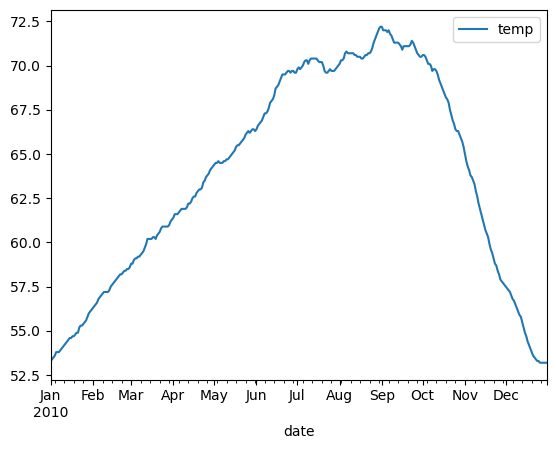

In [22]:
df.resample('D').max().plot();

#### Which month is the coldest, on average?

In [26]:
df['month'] = df.index.month_name()

In [27]:
df.head()

,temp,month
date,,
2010-01-01 00:00:00,47.8,January
2010-01-01 01:00:00,47.4,January
2010-01-01 02:00:00,46.9,January
2010-01-01 03:00:00,46.5,January
2010-01-01 04:00:00,46.0,January


In [32]:
df.groupby(df.index.month_name()).mean().idxmin()

temp    January
dtype: object

In [33]:
df.groupby('month').mean().min()

temp    49.98414
dtype: float64

#### Which month has the highest average temperature?

In [34]:
df.groupby(df.index.month_name()).mean().idxmax()

temp    September
dtype: object

In [36]:
df.resample('M').mean().max()

temp    62.487083
dtype: float64

#### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [43]:
df = df.drop(columns='month')

In [46]:
df_daily = df.resample('D').agg(['min','max'])
df_daily.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [58]:
df_daily.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [57]:
df_daily['temp']['min']

date
2010-01-01    45.8
2010-01-02    46.0
2010-01-03    46.1
2010-01-04    46.1
2010-01-05    46.1
              ... 
2010-12-27    45.6
2010-12-28    45.6
2010-12-29    45.6
2010-12-30    45.6
2010-12-31    45.8
Freq: D, Name: min, Length: 365, dtype: float64

In [61]:
df_daily['diff'] = df_daily.temp['max'] - df_daily.temp['min']

In [62]:
df_daily.head()

temp       diff
             min   max     
date                       
2010-01-01  45.8  53.3  7.5
2010-01-02  46.0  53.4  7.4
2010-01-03  46.1  53.5  7.4
2010-01-04  46.1  53.6  7.5
2010-01-05  46.1  53.8  7.7

In [68]:
df_daily.resample('M').max()['diff'].sort_values().tail(1)

date
2010-08-31    15.0
Name: diff, dtype: float64

#### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

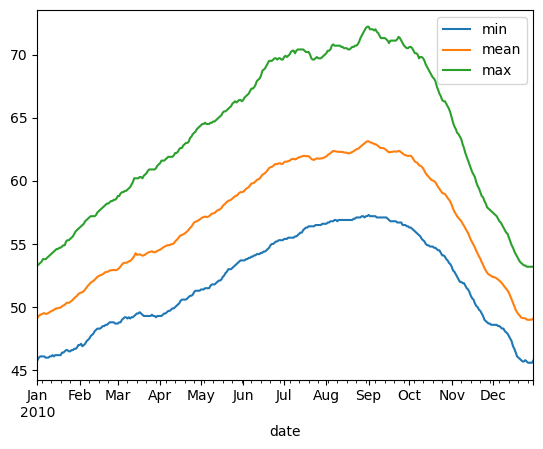

In [83]:
df.resample('D').agg(['min','mean','max']).temp.plot();

#### Use the above dataset for the following exercises:

In [85]:
df = data.seattle_weather()
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [86]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [88]:
df = df.set_index('date')
df = df.sort_index()

In [89]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


#### Which year and month combination has the highest amount of precipitation?

In [92]:
df.resample('M').sum().precipitation.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

In [93]:
df.resample('M').sum().precipitation.max()

284.5

#### Visualize the amount of monthly precipitation over time.

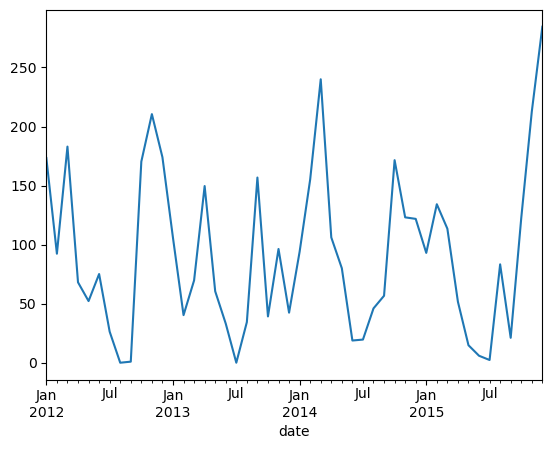

In [96]:
df.resample('M').sum().precipitation.plot();

#### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

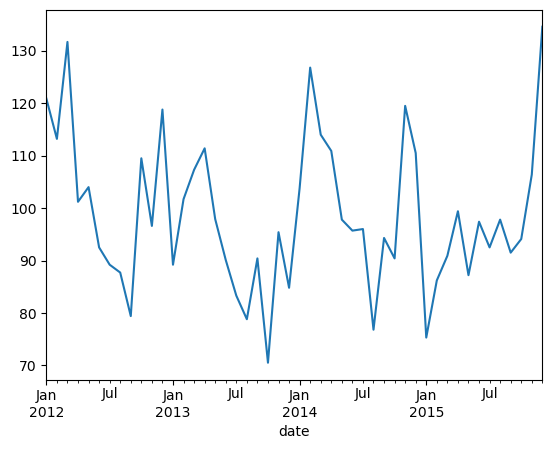

In [105]:
df.resample('M').sum().wind.plot();

#### Which year-month combination is the windiest?

In [112]:
df.resample('M').sum().wind.sort_values(ascending=False).head(1)

date
2015-12-31    134.6
Name: wind, dtype: float64

#### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [122]:
df [df.weather == 'sun'].index.year.value_counts()

2014    211
2013    205
2015    180
2012    118
Name: date, dtype: int64

In [125]:
df [df.weather == 'sun'].resample('Y').count().weather.idxmax()

Timestamp('2014-12-31 00:00:00', freq='A-DEC')

In [126]:
df [df.weather == 'sun'].resample('Y').count().weather

date
2012-12-31    118
2013-12-31    205
2014-12-31    211
2015-12-31    180
Freq: A-DEC, Name: weather, dtype: int64

#### In which month does it rain the most?

In [128]:
df.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [136]:
df.groupby(df.index.month_name()).sum().precipitation.idxmax()

'November'

In [137]:
df.groupby(df.index.month_name()).sum().precipitation.max()

642.5

#### Which month has the most number of days with a non-zero amount of precipitation?

In [148]:
df['month'] = df.index.month_name()
df.head()

,precipitation,temp_max,temp_min,wind,weather,month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,January
2012-01-02,10.9,10.6,2.8,4.5,rain,January
2012-01-03,0.8,11.7,7.2,2.3,rain,January
2012-01-04,20.3,12.2,5.6,4.7,rain,January
2012-01-05,1.3,8.9,2.8,6.1,rain,January


In [155]:
df [df.precipitation > 0].groupby('month').count().weather.sort_values().tail(1)

month
December    81
Name: weather, dtype: int64

#### Use the above dataset for the following exercises:

In [157]:
df = data.flights_20k()

In [158]:
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [160]:
df = df.set_index('date')
df = df.sort_index()

In [161]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


#### Convert any negative delays to 0.

In [163]:
df.delay = np.where(df.delay < 0, 0, df.delay)

In [164]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


#### Which hour of the day has the highest average delay?

In [170]:
df['hour'] = df.index.hour

In [175]:
df.groupby('hour').mean().delay.sort_values().tail(1)

hour
3    302.5
Name: delay, dtype: float64

#### Does the day of the week make a difference in the delay amount?

In [179]:
df['weekday'] = df.index.day_name()

In [180]:
df.head()

,delay,distance,origin,destination,hour,weekday
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [183]:
df.groupby('weekday').mean().delay.sort_values()

weekday
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

#### Does the month make a difference in the delay amount?

In [189]:
df['month'] = df.index.month_name()

In [191]:
df.groupby('month').mean().delay

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64